In [2]:
# Setup the library
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import numpy as np
import math

top_level=f'{os.getcwd()}/../../'
pr.addLibraryPath( f'{top_level}/scripts' )
import setupLibPaths
import epix_hr_single_10k
import ePixViewer.Cameras as cameras

%run ../ASIC_V4/supportFunctions.ipynb

In [3]:
# Create and start the root class
root = epix_hr_single_10k.RootLCLSIITiming(
    top_level   = top_level,
    sim         = False,
    dev         = '/dev/datadev_0',
    asicVersion = 4
)
root.start()

Simulation mode : False
Start: Started zmqServer on ports 9099-9101
    To start a gui: python -m pyrogue gui --server='localhost:9099'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9099)


In [4]:
# Create useful pointers
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

###################################################
#             Firmware Version                    #
###################################################
Path         = ePixHr10kT.Core.AxiVersion
FwVersion    = 0x3010000
UpTime       = 1 day, 19:29:27
GitHash      = 0x563a68027652195474e6a610098a11775111615a
XilinxDnaId  = 0x4002000101604ee71c618205
FwTarget     = EpixHr10kTLclsIITiming
BuildEnv     = Vivado v2022.2
BuildServer  = rdsrv408 (Ubuntu 20.04.6 LTS)
BuildDate    = Thu 02 Nov 2023 02:16:58 PM PDT
Builder      = ddoering
###################################################


# Baseline TEST all - 320MHz refGenB,RefGenC modified

In [5]:
MAX_NUMBER_OF_FRAMES_PER_BATCH  = 1000
cameraType            = 'ePixHr10kTBatcher'
bitMask               = 0xffff
currentCam = cameras.Camera(cameraType = cameraType)
currentCam.bitMask = bitMask

Camera  ePixHr10kTBatcher  selected.


In [6]:
#Initialze the camera
#[routine, asic0, asic1, asic2, asic3]'
initSequence = 5
root.EpixHR.InitASIC([initSequence,0,0,1,0])
#points to the ASIC device under test
ASIC = root.EpixHR.Hr10kTAsic2
root.EpixHR.BatcherEventBuilder0.Blowoff.set(True)
root.EpixHR.BatcherEventBuilder0.Bypass.set(1)
root.EpixHR.BatcherEventBuilder1.Blowoff.set(False)
root.EpixHR.BatcherEventBuilder1.Bypass.set(1)
root.EpixHR.BatcherEventBuilder2.Blowoff.set(True)

Rysync ASIC started
Init ASIC script started
Loading MMCM configuration
/u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/../..//yml/ePixHr10kT_MMCM_320MHz.yml
Completed
Loading supply configuration
/u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/../..//yml/ePixHr10kT_PowerSupply_Enable.yml
Loading register control (waveforms) configuration
/u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/../..//yml/ePixHr10kT_RegisterControl_R0Width12us_AcqWidth24us_320MHz.yml
Loading packet registers
Disabling packet lanes for ASIC 0
Disabling packet lanes for ASIC 1
Disabling packet lanes for ASIC 3
/u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/../..//yml/ePixHr10kT_PacketRegisters.yml
Taking asic off of reset
Loading ASIC and timing configuration
Loading  /u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/../..//yml/ePixHr10kT_PLLBypass_248MHz_ASIC_2.yml
Command executed :  <class 'pyrogue._Command.BaseCommand'> - ePixHr10kT.EpixHR.Hr10kTAsic2.ClearMatr

In [7]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(10)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)


In [8]:
#use system with batcher and missing ASICs
root.EpixHR.SspLowSpeedDecoderReg.enable.set(True)
print ("Locked lanes: %x" % root.EpixHR.SspLowSpeedDecoderReg.Locked.get())
#Only ASIC 1 is available so disable the 6 lower lanes
root.EpixHR.PacketRegisters0.DisableLane.set(0x3FF)
root.EpixHR.PacketRegisters1.DisableLane.set(0xFC0)



Locked lanes: 3f000


In [9]:
print(ASIC.Preamp.get())
print(ASIC.Vld1_b.get())
print(ASIC.Pixel_CB.get())
print(ASIC.Filter_DAC.get())
print(ASIC.VRef_DAC.get())

4
1
4
38
53


In [10]:
print('DHG', ASIC.DHg.get())
print('RefGenB', ASIC.RefGenB.get())
print('RefGenC', ASIC.RefGenC.get())
print('S2D_1_b', ASIC.S2D_1_b.get())
print('shvc_DAC', ASIC.shvc_DAC.get())
print('S2dDacBias', ASIC.S2dDacBias.get())
DHg = True
RefGenB = 2
RefGenC = 3
S2D_1_b = 0
shvc_DAC = 23
S2dDacBias = 3
print("")
ASIC.DHg.set(DHg)  
ASIC.RefGenB.set(RefGenB)
ASIC.RefGenC.set(RefGenC)
ASIC.S2D_1_b.set(S2D_1_b)
ASIC.shvc_DAC.set(shvc_DAC)
ASIC.S2dDacBias.set(S2dDacBias)
print('DHG', ASIC.DHg.get())
print('RefGenB', ASIC.RefGenB.get())
print('RefGenC', ASIC.RefGenC.get())
print('S2D_1_b', ASIC.S2D_1_b.get())
print('shvc_DAC', ASIC.shvc_DAC.get())
print('S2dDacBias', ASIC.S2dDacBias.get())

DHG True
RefGenB 3
RefGenC 2
S2D_1_b 0
shvc_DAC 23
S2dDacBias 3

DHG True
RefGenB 2
RefGenC 3
S2D_1_b 0
shvc_DAC 23
S2dDacBias 3


In [31]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.2)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.2)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.2)

# Set references 
Preamp = 4 #4
Vld1_b = 1 #1
Pixel_CB= 4 #4
Filter_DAC= 38 #33
VRef_DAC = 53 #22

setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

pedsList = [12,12,8,0,0]
trbitList = [True,0,0,True,0]

#########
index = 0
trbit = trbitList[index]
ASIC.trbit.set(trbit)
peds = pedsList[index]
ASIC.ClearMatrix(peds)
######################################################################################################################
# Remove previous dataset
filename = (f'/u1/lorenzor/10kthr_data/temp.dat')

#########
index = 1
trbit = trbitList[index]
ASIC.trbit.set(trbit)
peds = pedsList[index]
ASIC.ClearMatrix(peds)

print('Cfg done')


# FH = complete_test(filename)
imgDesc = run_asic_test(numFrames = 2000, initialDelay = 0)

print('Done')
print(np.shape(imgDesc))




Preamp 4
Vld1_b 1
Pixel_CB 4
Filter_DAC 38
VRef_DAC 53
Command executed :  <class 'pyrogue._Command.BaseCommand'> - ePixHr10kT.EpixHR.Hr10kTAsic2.ClearMatrix
Command executed :  <class 'pyrogue._Command.BaseCommand'> - ePixHr10kT.EpixHR.Hr10kTAsic2.ClearMatrix
Cfg done
/u1/lorenzor/10kthr_data/temp.dat
Aquisition Counter 768776
DAQ Counter 668684
Number of frames received: 1
Delta Aquisition Counter: 2004
Number of frames received: 2004
Starting to get data set 0
Read 1000 frames
numberOfFrames in the 3D array:  1000
Starting descrambling images
(1000, 56072)
Done
(2000, 145, 384)


(array([  4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   4.,
          4.,   4.,  40.,  34.,  42.,  82., 160.,  96.,  74.,  72.,  86.,
        204., 134., 120.,  98., 208.,  54.,  80., 132.,  96., 122.,  12.,
         10.,   4.,   8.,   4.,   2.,   0.,   6.]),
 array([6284.   , 6285.225, 6286.45 , 6287.675, 6288.9  , 6290.125,
        6291.35 , 6292.575, 6293.8  , 6295.025, 6296.25 , 6297.475,
        6298.7  , 6299.925, 6301.15 , 6302.375, 6303.6  , 6304.825,
        6306.05 , 6307.275, 6308.5  , 6309.725, 6310.95 , 6312.175,
        6313.4  , 6314.625, 6315.85 , 6317.075, 6318.3  , 6319.525,
        6320.75 , 6321.975, 6323.2  , 6324.425, 6325.65 , 6326.875,
        6328.1  , 6329.325, 6330.55 , 6331.775, 6333.   ]),
 <BarContainer object of 40 artists>)

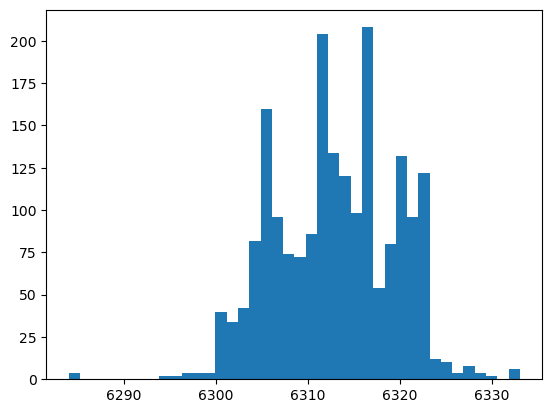

In [38]:
plt.hist(imgDesc[:,1,1], bins=40)

In [51]:
ASIC.mTest.set(True)

#sets HSDAC device
root.EpixHR.HSDac.enable.set(True)
#reset status
root.EpixHR.HSDac.WFEnabled.set(False)
root.EpixHR.HSDac.waveformSource.set(0)
root.EpixHR.HSDac.externalUpdateEn.set(False)
root.EpixHR.HSDac.run.set(False)

#configure
root.EpixHR.HSDac.rCStartValue.set(0)
root.EpixHR.HSDac.rCStopValue.set(65535)
root.EpixHR.HSDac.rCStep.set(50)
root.EpixHR.HSDac.WFEnabled.set(True)
root.EpixHR.HSDac.waveformSource.set(1)
root.EpixHR.HSDac.externalUpdateEn.set(True)
root.EpixHR.HSDac.run.set(True)

imgDesc = run_asic_test(numFrames = 2000, initialDelay = 0)


/u1/lorenzor/10kthr_data/temp.dat
Aquisition Counter 776785
DAQ Counter 676693
Number of frames received: 2
Delta Aquisition Counter: 2004
Number of frames received: 2004
Starting to get data set 0
Read 1000 frames
numberOfFrames in the 3D array:  1000
Starting descrambling images
(1000, 56072)


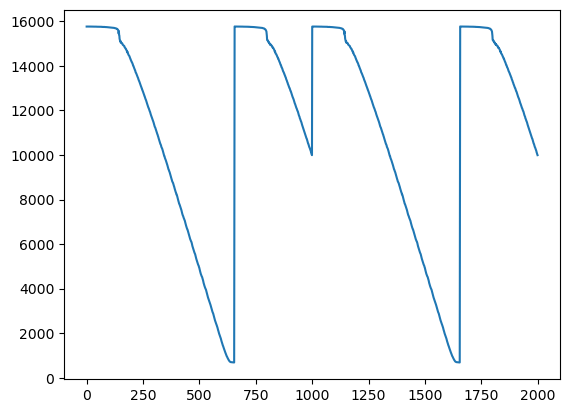

In [50]:
plt.plot(imgDesc[:,1,1])